# LAB 7: Error analysis

Objectives
* Construct a  linear text classifier using SGDClassifier
* Evaluate its performance and categorize the errors that it makes
* Eaxmine model's coefficients and decision function values
* Interpret model results using LIME

In [1]:
import numpy as np
import pandas as pd
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

---

## Load data

In [2]:
train = pd.read_parquet("s3://ling583/lab7-train.parquet", storage_options={"anon":True})
test = pd.read_parquet("s3://ling583/lab7-test.parquet", storage_options={"anon":True})

In [3]:
import cloudpickle
from sklearn.metrics import classification_report, f1_score, plot_confusion_matrix

In [4]:
sgd = cloudpickle.load(open("sgd.model", "rb"))

In [5]:
sgd

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.75, min_df=5,
                                 preprocessor=<cyfunction identity at 0x7f1370fe52b0>,
                                 tokenizer=<function tokenize at 0x7f13703ce430>)),
                ('tfidftransformer', TfidfTransformer()),
                ('sgdclassifier', SGDClassifier())])

In [6]:
predicted = sgd.predict(test["text"])
print(classification_report(test["topics"], predicted))

              precision    recall  f1-score   support

        GJOB       0.98      0.93      0.95       573
        GPOL       0.94      0.96      0.95      1853
        GSPO       1.00      0.99      1.00      1410
        GVIO       0.92      0.91      0.92       928

    accuracy                           0.96      4764
   macro avg       0.96      0.95      0.95      4764
weighted avg       0.96      0.96      0.96      4764



---

## Confusion matrix

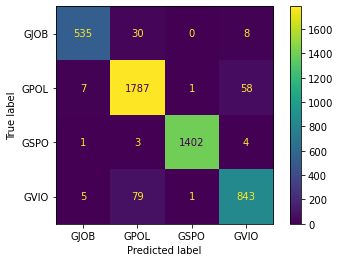

In [7]:
plot_confusion_matrix(sgd, test["text"], test["topics"])

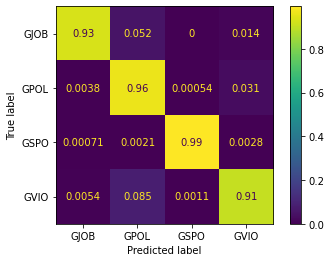

In [8]:
plot_confusion_matrix(sgd, test["text"], test["topics"], normalize='true')

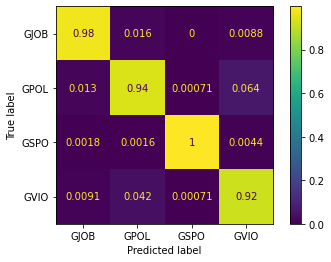

In [9]:
plot_confusion_matrix(sgd, test["text"], test["topics"], normalize='pred')

**TO DO:**Summarize this section: what does the confusion matrix tell us about our classifier?

The confusion matrix tells us that our classifier has an uneven amount of articles being labeled more than others. For example, we have 3 times as many articles about politics than we do about jobs but is more or less a similar amount compared to sports. However, we are not seeing as many articles mislabeled as sports compared to the 130 or so articles mislabeled as politics. Thus indicating that we should have different labels to classify our articles. Using more specific classifications would improve our results to avoid incorrect predictions as politics has a large variety of topics related to it.

----

## Errors

In [10]:
err = test[(test['topics']=='GVIO')&(predicted=='GPOL')]
len(err)

79

In [11]:
err['text'].iloc[0]

"Documents missing on chemicals in Gulf - report. The U.S. Defence Department said nearly all the classified documents recording incidents of chemical weapons use during the Gulf war are missing despite an exhaustive search, the New York Times reported on Friday. The paper said copies of the logs were kept in safes at two U.S. locations, but a new report from the Defence Department indicates only 36 pages out of an estimated 200 have been found in a search by its investigators. The missing logs include those for eight days in March 1991 when U.S. troops unknowingly blew up chemical weapons in an Iraqi arms dump, the paper said. Those logs, which were maintained for Gen. Norman Schwarzkopf, were first reported missing in December. Friday's paper said the new report heightens speculation about a cover-up or criminal incompetence within the Defence Department, which had denied the existence of such records before agreeing last year to release them to a veterans' group. It said the logs we

In [12]:
err['text'].iloc[1]

'China to approve Shell petchem joint venture soon. China\'s executive vice chairman of state planning Ye Qing on Friday said he expected the Chinese authorities soon to approve a major joint venture project to build a petrochemical plant with Shell in Guangdong province. "I saw the managing director of Shell two days ago and I told him that I personally and the state commission will approve this project very soon," Ye told reporters in Paris at a press conference following an International Energy Agency ministerial meeting. The project to build a petrochemical plant is a joint venture with the state China National Offshore Oil Corporation and has been under discussion since 1971 Ye said the plants was expected to produce 85 million tonnes a year of ethylene, having been raised from previous plans for 45 million tonnes of annual capacity. Ye also said that plans for a refinery at the same site remained on hold. "To ensure a better return for the project we have decided not to build a r

In [13]:
err['text'].iloc[2]

'Australian Jews scan Swiss Holocaust bank list. Hundreds of relatives of Jewish Holocaust victims living in Australia could be eligible for funds in Swiss banks after the publication of more than 2,000 pre-1945 accounts, Jewish officials said on Wednesday. While only four Australian names were on the list, Australia boasts the world\'s fourth largest Jewish population, due to large scale post-World War Two migration. "There are more Jews of Polish decent living in Australia than there are Jews living in Poland," said Jeremy Jones, spokesman for the Executive Council of Australian Jewry. "There could potentially be hundreds (of relatives) on this list, but we do not believe that this list is comprehensive or exhaustive. This is the list from the Swiss banks: it is not a list discovered by any independent audit," Jones told Reuters. The Swiss Bankers Association took out a double-page advertisement in The Australian national newspaper, listing more than 2,000 pre-1945 accounts, includin

In [14]:
for t in err['text'].sample(20):
    print(t)
    print()

Divided Hong Kong families protest to be reunited. More than 100 members of Hong Kong families separated from their loved ones in China staged a noisy protest outside the legislature on Wednesday to demand their relatives be allowed to settle in the British colony. "I want a home with my father and mother," read placards waved by children, some little older than toddlers, as lawmakers arrived for a debate on the highly-charged topic. The demonstrators urged deputies to support a motion urging the government to take over the job of vetting applications from mainlanders seeking to migrate to Hong Kong, giving priority to those applying on family reunion grounds. Hong Kong permits 150 mainland Chinese to migrate each day. The Chinese authorities decide who gets the "one-way permit" entitling them to enter the territory. Application times vary widely from several months to several years. Some families have been split for more than a decade. Critics say the system is open to corruption and 

In [15]:
err = test[(test['topics']=='GPOL')&(predicted=='GVIO')]
len(err)

58

In [17]:
for t in err['text'].sample(5):
    print(t)
    print()

Singapore arrest 140 illegal immigrants. Singapore police said on Wednesday they had arrested 140 suspected illegal immigrants in a 30-hour operation. A police spokesman said the suspects were from neighbouring countries but declined to name them. "More then 900 officers were involved in the 30-hour operation," a police statement said. It said the operation was part of continuing efforts targetted at illegal immigrants in Singapore. Police sources said it was also linked to a recent spate of burglaries. -- Singapore Newsroom (+65 870 3080)

Ex-Philippine rebel leader vows to help farmers. Former Moslem rebel leader Nur Misuari, who last year traded his guns for peace in the southern Philippines, on Tuesday vowed to help coconut farmers increase productivity. "At one time you were under the influence of people who did nothing but exploit you, stole the little that you had. Now we intend to rectify all of this," Misuari told an audience of farmers. He said improving the lot of coconut fa

**TO DO:** Based on your error analysis, what are some of the classifier's strengths and weaknesses? What might we do to improve it?

The classifier's strength is that it's good at labeling articles that are more or less about a singular topic (i.e. sports and jobs as those topics tend to not involve/clash with each other). The classifier's weakness is that it tags articles with just one label when these topics aren't necessarily mutually exclusive (i.e. politics and violence are involved with each other many times and thus articles about politics or violence will probably also include violence or politics). We can improve the classifier by allowing it to apply multiple labels to the articles as labels aren't mutually exclusive with others.